In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('../data/unprocessed/Tweets.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [98]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [99]:
# some initial data integrity analysis

def analyse_columns(dataframe: pd.DataFrame):
    column_analysis = []

    for column in dataframe.columns:
        data_type = dataframe[column].dtype
        total_missing = dataframe[column].isnull().sum()
        missing_ratio = total_missing / len(dataframe) * 100
        unique_values = dataframe[column].nunique()

        column_info = {
            'Column': column,
            'Data Type': data_type,
            'Missing Values': total_missing,
            'Missing Ratio (%)': f'{missing_ratio:.2f}%',
            'Unique Values': unique_values
        }
        column_analysis.append(column_info)

    return pd.DataFrame(column_analysis)

analyse_columns(df)

,Column,Data Type,Missing Values,Missing Ratio (%),Unique Values
0,tweet_id,int64,0,0.00%,14485
1,airline_sentiment,object,0,0.00%,3
2,airline_sentiment_confidence,float64,0,0.00%,1023
3,negativereason,object,5462,37.31%,10
4,negativereason_confidence,float64,4118,28.13%,1410
5,airline,object,0,0.00%,6
6,airline_sentiment_gold,object,14600,99.73%,3
7,name,object,0,0.00%,7701
8,negativereason_gold,object,14608,99.78%,13
9,retweet_count,int64,0,0.00%,18


In [100]:
'''
Initial Observations:

- Strong Classifiers: Fields like 'airline_sentiment' and 'airline' exhibit no missing values and a limited range of unique values, making them robust classifiers for modeling purposes.

- Negative Sentiment Analysis: The 'negativereason' field, despite a relatively small set of unique values against its missing values, is pertinent solely to negative sentiments. This specificity might skew the apparent ratio of missing data. However, for detailed analysis focusing on negative sentiments, this field, along with 'negativereason_confidence', remains valuable.

- Limited Utility of Certain Fields: The 'name' and 'tweet_id' fields are likely of limited value for a minimal model. The 'tweet_id' has undergone several changes, diminishing its reliability as a source of metadata. Unless supplemented with additional data from Twitter's API, its utility is minimal. Similarly, 'name', being a user-defined unique identifier, offers limited correlation to the user's airline experience. Notably, the count of unique names is approximately half that of unique tweet IDs, indicating a substantial number of tweets from repeat users.

- Geographical Insights: The 'user_timezone' and 'tweet_location' fields are instrumental for user profiling, potentially revealing sentiment trends across different geographical areas.

- Time Series Analysis: The 'tweet_created' field is devoid of missing values and is invaluable for time series analysis, offering insights into how sentiments evolve over time.
'''


"\nInitial Observations:\n\n- Strong Classifiers: Fields like 'airline_sentiment' and 'airline' exhibit no missing values and a limited range of unique values, making them robust classifiers for modeling purposes.\n\n- Negative Sentiment Analysis: The 'negativereason' field, despite a relatively small set of unique values against its missing values, is pertinent solely to negative sentiments. This specificity might skew the apparent ratio of missing data. However, for detailed analysis focusing on negative sentiments, this field, along with 'negativereason_confidence', remains valuable.\n\n- Limited Utility of Certain Fields: The 'name' and 'tweet_id' fields are likely of limited value for a minimal model. The 'tweet_id' has undergone several changes, diminishing its reliability as a source of metadata. Unless supplemented with additional data from Twitter's API, its utility is minimal. Similarly, 'name', being a user-defined unique identifier, offers limited correlation to the user's 

In [101]:
'''
- High Missing Values: 'airline_sentiment_gold' and 'negativereason_gold' exhibit missing values in the upper 99th percentile, while 'tweet_coord' shows missing values in the upper 93rd percentile.

- Rationale for Exclusion: Due to their minimal informational content and the impracticality of imputing such a high volume of missing instances, these columns are omitted from the analysis.
'''


df = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)

# let's also rename the negative reason fields for consistency

df = df.rename(columns={'negativereason': 'negative_reason', 
                        'negativereason_confidence': 'negative_reason_confidence'})


In [102]:
# time to explore the individual fields in more depth

analyse_columns(df)

,Column,Data Type,Missing Values,Missing Ratio (%),Unique Values
0,tweet_id,int64,0,0.00%,14485
1,airline_sentiment,object,0,0.00%,3
2,airline_sentiment_confidence,float64,0,0.00%,1023
3,negative_reason,object,5462,37.31%,10
4,negative_reason_confidence,float64,4118,28.13%,1410
5,airline,object,0,0.00%,6
6,name,object,0,0.00%,7701
7,retweet_count,int64,0,0.00%,18
8,text,object,0,0.00%,14427
9,tweet_created,object,0,0.00%,14247


In [103]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

14640


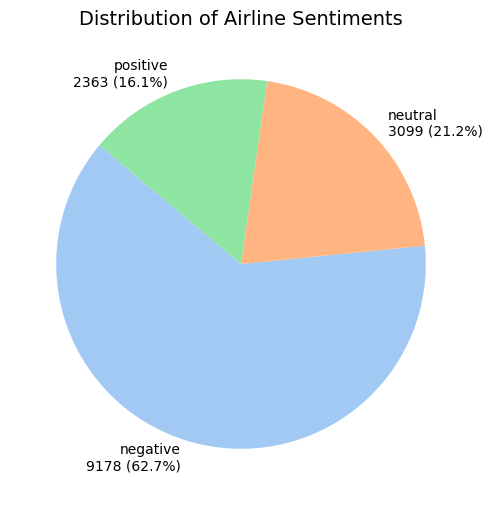

In [104]:
sentiment_counts = df['airline_sentiment'].value_counts()
labels = sentiment_counts.index
counts = sentiment_counts.values
total = sum(counts)
labels_with_counts = [f'{label}\n{count} ({(count/total)*100:.1f}%)' for label, count in zip(labels, counts)]

print(total)

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels_with_counts, startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Airline Sentiments', fontsize=14)
plt.show()

In [105]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

14640


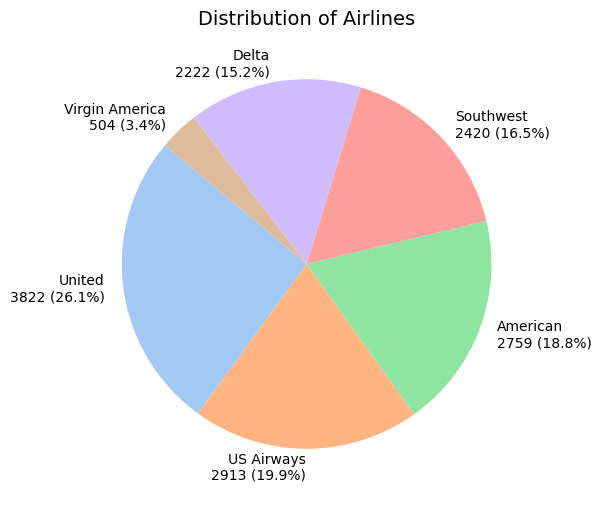

In [106]:
airline_counts = df['airline'].value_counts()
labels = airline_counts.index
counts = airline_counts.values
total = sum(counts)
labels_with_counts = [f'{label}\n{count} ({(count/total)*100:.1f}%)' for label, count in zip(labels, counts)]

print(total)

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels_with_counts, startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Airlines', fontsize=14)
plt.show()

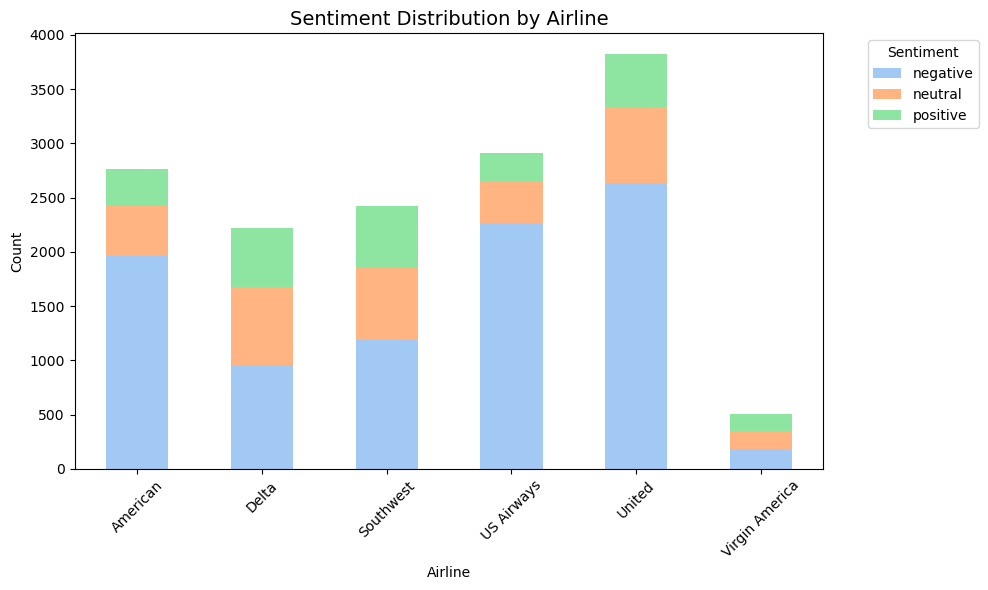

In [107]:
sentiment_by_airline = df.groupby('airline')['airline_sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))

sentiment_by_airline.plot(kind='bar', stacked=True, color=sns.color_palette('pastel'), ax=plt.gca())

plt.title('Sentiment Distribution by Airline', fontsize=14)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [111]:
def sentiment_ratio_by_airline(dataframe: pd.DataFrame):
    sentiment_counts = dataframe.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
    sentiment_ratios = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)
    ratios_df = sentiment_ratios.reset_index()
    ratios_df.columns = ['airline', 'negative', 'neutral', 'positive']

    return ratios_df

sentiment_ratio_by_airline(df)

,airline,negative,neutral,positive
0,American,0.710402,0.167814,0.121783
1,Delta,0.429793,0.325383,0.244824
2,Southwest,0.490083,0.274380,0.235537
3,US Airways,0.776862,0.130793,0.092345
4,United,0.688906,0.182365,0.128728
5,Virgin America,0.359127,0.339286,0.301587
